Synthetic log file 'synthetic_app.log' created.
Summary exported to 'log_summary.csv'
{'INFO': 514, 'WARNING': 184, 'ERROR': 196, 'CRITICAL': 106}


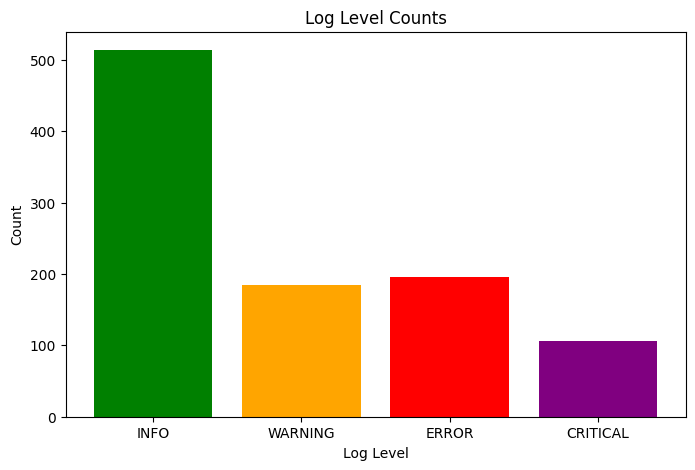

In [2]:

import re
import random
import datetime
import pandas as pd
import matplotlib.pyplot as plt


levels = ["INFO", "WARNING", "ERROR", "CRITICAL"]
logs = []
for i in range(1000):
    timestamp = datetime.datetime(2025, 8, 22, random.randint(0,23), random.randint(0,59), random.randint(0,59))
    level = random.choices(levels, weights=[0.5, 0.2, 0.2, 0.1])[0]
    message = f"Synthetic log message {i}"
    logs.append(f"{timestamp} - {level} - {message}")

with open("synthetic_app.log", "w") as f:
    for log in logs:
        f.write(log + "\n")

print("Synthetic log file 'synthetic_app.log' created.")



summary = {level:0 for level in levels}
timestamps = []

pattern = re.compile(r"(.*) - (INFO|WARNING|ERROR|CRITICAL) - ")

with open("synthetic_app.log", "r") as f:
    for line in f:
        match = pattern.match(line)
        if match:
            timestamp_str, level = match.groups()
            summary[level] += 1
            timestamps.append(datetime.datetime.fromisoformat(timestamp_str))


df_summary = pd.DataFrame(list(summary.items()), columns=["Level","Count"])
df_summary.to_csv("log_summary.csv", index=False)
print("Summary exported to 'log_summary.csv'")
print(summary)

plt.figure(figsize=(8,5))
plt.bar(summary.keys(), summary.values(), color=['green','orange','red','purple'])
plt.title("Log Level Counts")
plt.xlabel("Log Level")
plt.ylabel("Count")
plt.show()
